<a href="https://colab.research.google.com/github/tuxlimr/Celery_Preprocessing/blob/master/TimeSeries_in_BankNifty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
stock =  yf.download("HDFCBANK.NS", period="5y")

[*********************100%%**********************]  1 of 1 completed


In [3]:
stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-05,974.950012,979.825012,969.000000,978.000000,943.700806,2852648
2018-11-06,977.500000,988.000000,971.474976,973.275024,939.141602,4242794
2018-11-07,980.500000,982.474976,975.000000,978.974976,944.641663,479380
2018-11-09,979.099976,979.950012,968.150024,972.700012,938.586670,5050810
2018-11-12,975.750000,981.000000,958.575012,960.525024,926.838806,3953882
...,...,...,...,...,...,...
2023-10-30,1463.250000,1489.949951,1461.900024,1485.099976,1485.099976,11655491
2023-10-31,1504.000000,1504.000000,1474.000000,1476.500000,1476.500000,16317412
2023-11-01,1462.250000,1477.449951,1462.250000,1474.500000,1474.500000,16938733


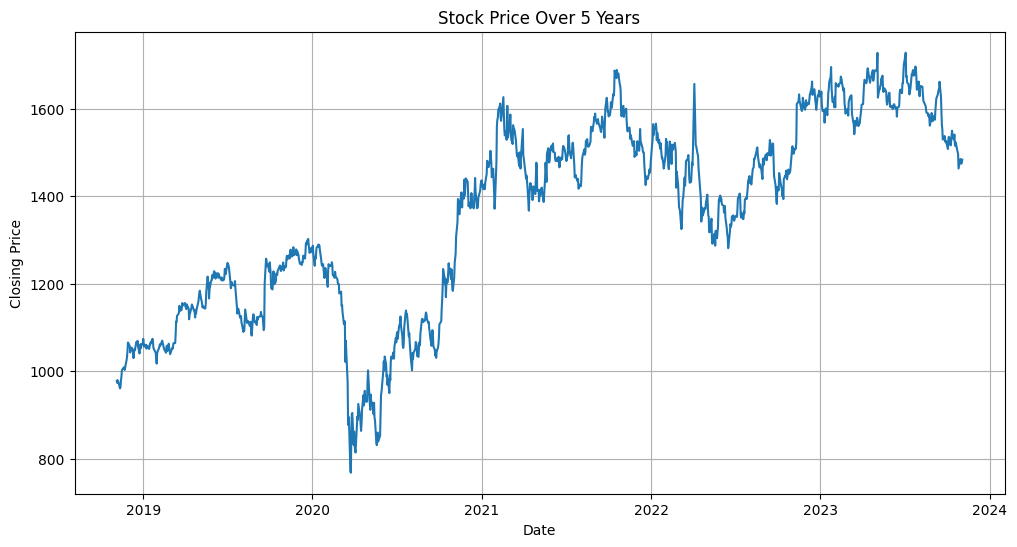

In [4]:
# Plot the closing price to observe seasonality
plt.figure(figsize=(12, 6))
plt.plot(stock['Close'])
plt.title('Stock Price Over 5 Years')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid()
plt.show()

### Box plot and interquartile range

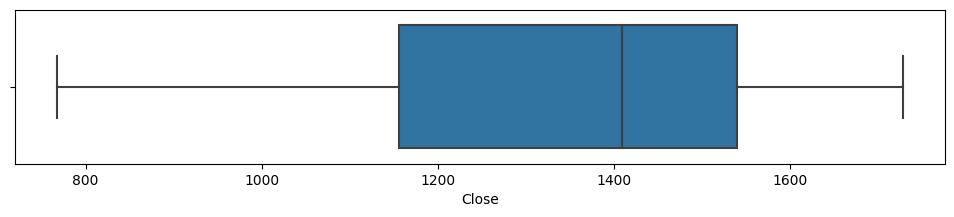

In [5]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=stock['Close'],whis=1.5)

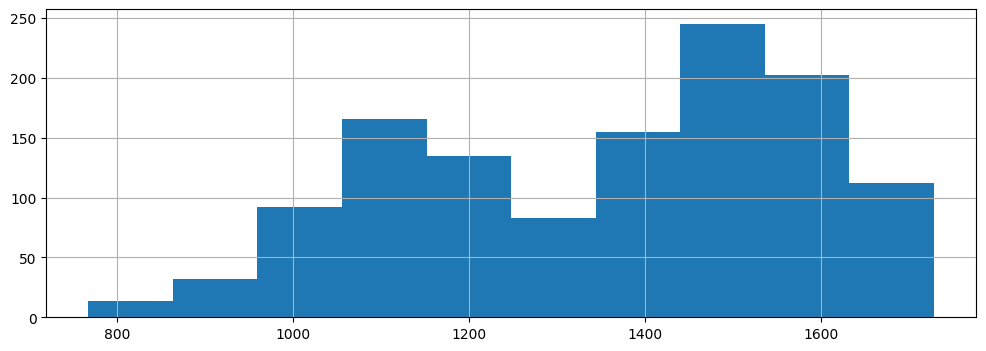

In [6]:
fig = stock.Close.hist(figsize = (12,4))

### Use Linear Interpolation

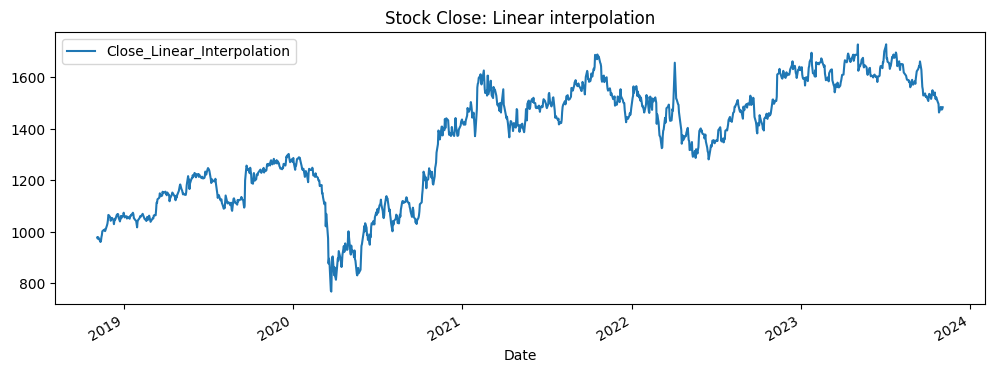

In [7]:
stock = stock.assign(Close_Linear_Interpolation=stock.Close.interpolate(method='linear'))
stock[['Close_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Stock Close: Linear interpolation')
plt.show(block=False)

In [8]:
stock['Close'] = stock['Close_Linear_Interpolation']
stock.drop(columns=['Close_Linear_Interpolation'],inplace=True)

### Time Series decomposition

In [9]:
### Additive seasonal decomposition

In [10]:
stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-05,974.950012,979.825012,969.000000,978.000000,943.700806,2852648
2018-11-06,977.500000,988.000000,971.474976,973.275024,939.141602,4242794
2018-11-07,980.500000,982.474976,975.000000,978.974976,944.641663,479380
2018-11-09,979.099976,979.950012,968.150024,972.700012,938.586670,5050810
2018-11-12,975.750000,981.000000,958.575012,960.525024,926.838806,3953882
...,...,...,...,...,...,...
2023-10-30,1463.250000,1489.949951,1461.900024,1485.099976,1485.099976,11655491
2023-10-31,1504.000000,1504.000000,1474.000000,1476.500000,1476.500000,16317412
2023-11-01,1462.250000,1477.449951,1462.250000,1474.500000,1474.500000,16938733


[*********************100%%**********************]  1 of 1 completed


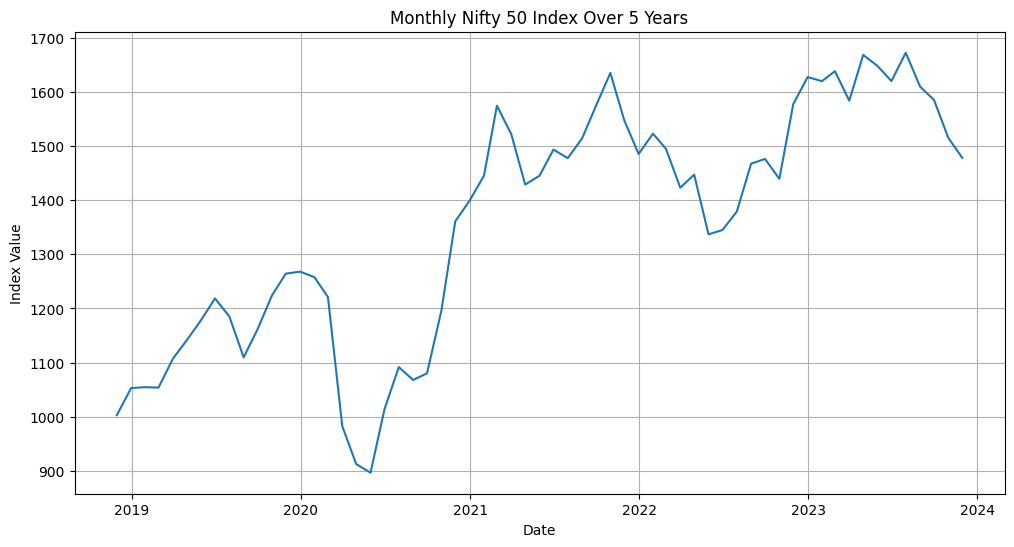

In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Ticker symbol for Nifty 50 index
nifty_ticker = "HDFCBANK.NS"

# Fetch historical Nifty 50 index data
data = yf.download(nifty_ticker, period="5y")

# Resample the data on a monthly basis to observe seasonality
monthly_data = data['Close'].resample('M').mean()

# Plot the monthly index values to observe seasonality
plt.figure(figsize=(12, 6))
plt.plot(monthly_data)
plt.title('Monthly Nifty 50 Index Over 5 Years')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.grid()
plt.show()


[*********************100%%**********************]  1 of 1 completed


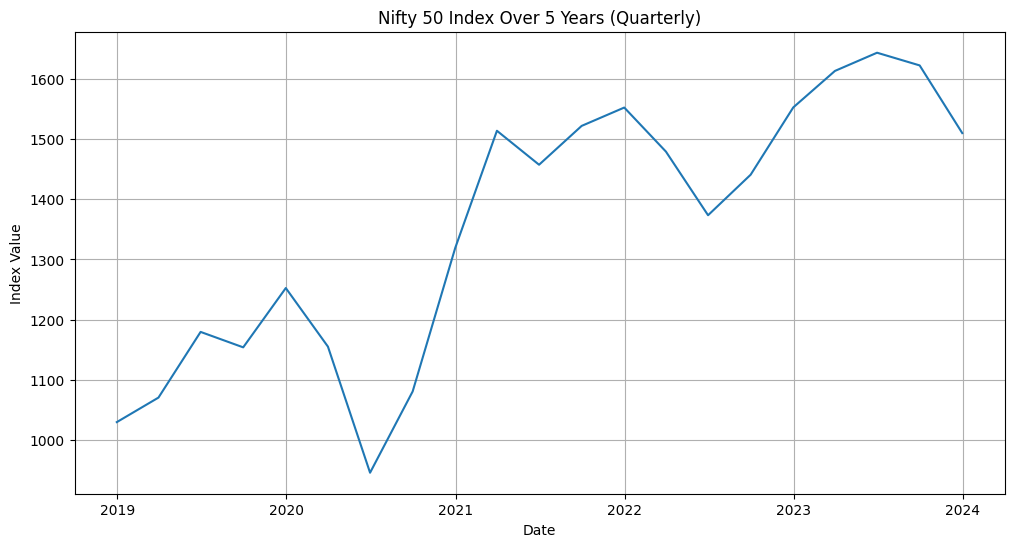

In [12]:

# Fetch historical Nifty 50 index data
data = yf.download(nifty_ticker, period="5y")

# Resample the data on a quarterly basis to observe seasonality
quarterly_data = data['Close'].resample('Q').mean()

# Plot the quarterly index values to observe seasonality
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data)
plt.title('Nifty 50 Index Over 5 Years (Quarterly)')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.grid()
plt.show()


[*********************100%%**********************]  1 of 1 completed


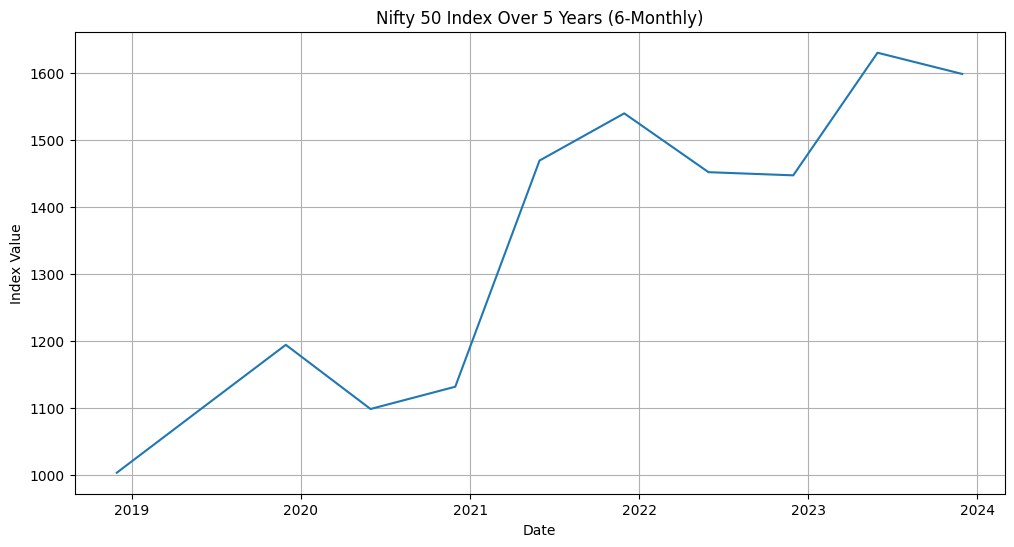

In [13]:

# Fetch historical Nifty 50 index data
data = yf.download(nifty_ticker, period="5y")

# Resample the data on a 6-month basis to observe seasonality
six_monthly_data = data['Close'].resample('6M').mean()

# Plot the 6-month index values to observe seasonality
plt.figure(figsize=(12, 6))
plt.plot(six_monthly_data)
plt.title('Nifty 50 Index Over 5 Years (6-Monthly)')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.grid()
plt.show()


[*********************100%%**********************]  1 of 1 completed


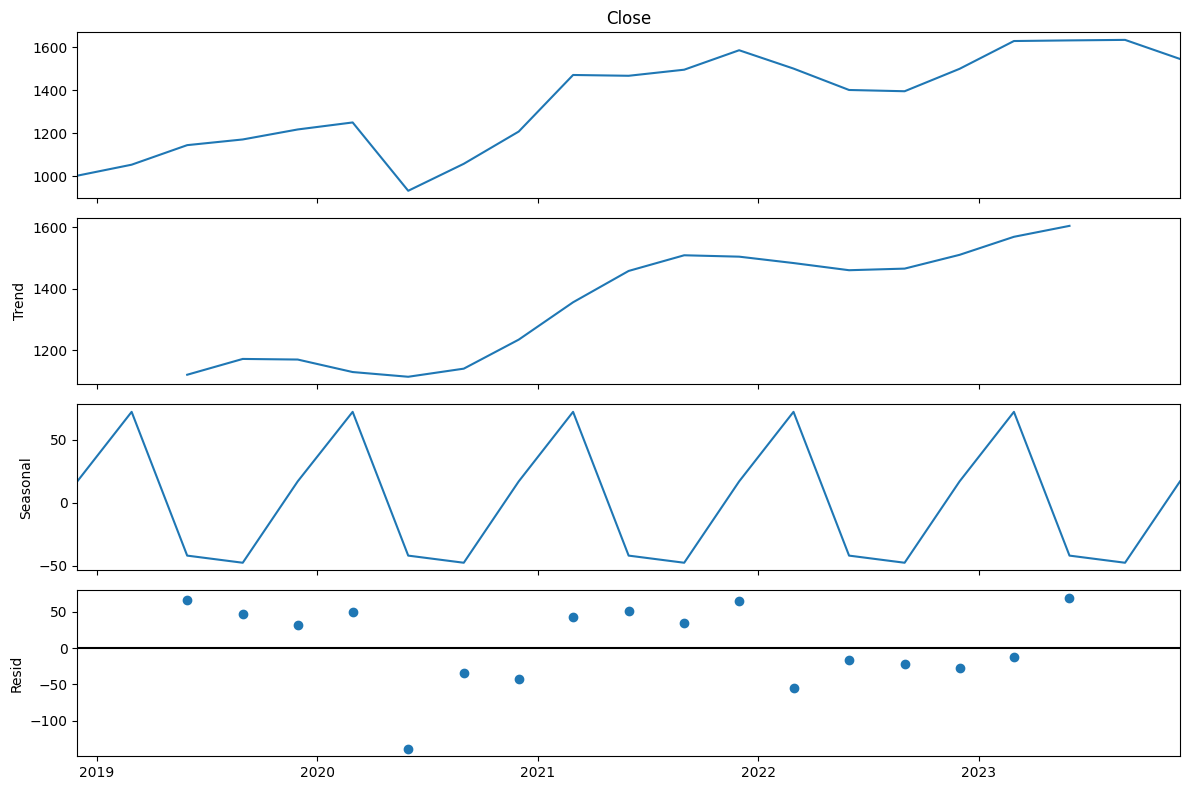

In [14]:

from pylab import rcParams
import statsmodels.api as sm



# Fetch historical Nifty 50 index data
data = yf.download(nifty_ticker, period="5y")

# Resample the data on a 6-month basis to observe seasonality
six_monthly_data = data['Close'].resample('3M').mean().dropna()

# Seasonal decomposition
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(six_monthly_data, model='additive')  # Adjusted for 6-month data
fig = decomposition.plot()
plt.show()


[*********************100%%**********************]  1 of 1 completed


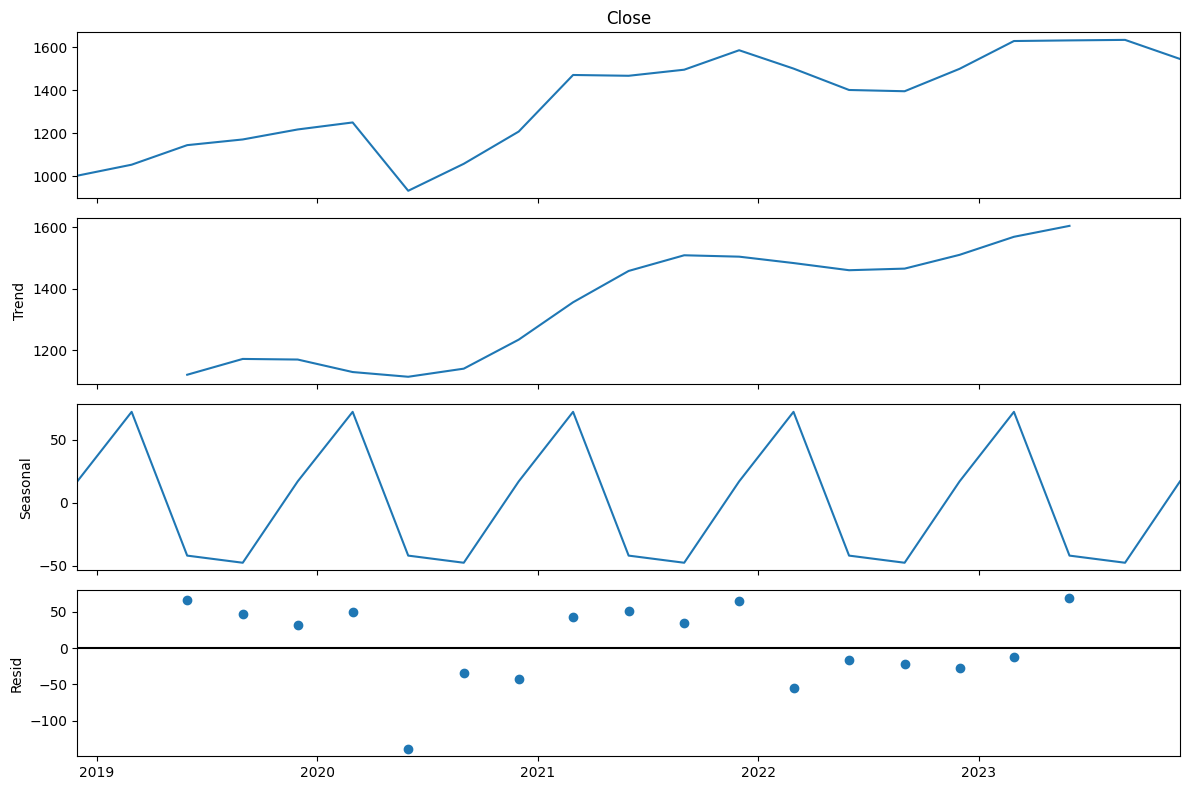

In [15]:

from pylab import rcParams
import statsmodels.api as sm



# Fetch historical Nifty 50 index data
data = yf.download(nifty_ticker, period="5y")

# Resample the data on a 6-month basis to observe seasonality
six_monthly_data = data['Close'].resample('3M').mean().dropna()

# Seasonal decomposition
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(six_monthly_data, model='additive')  # Adjusted for 6-month data
fig = decomposition.plot()
plt.show()

[*********************100%%**********************]  1 of 1 completed


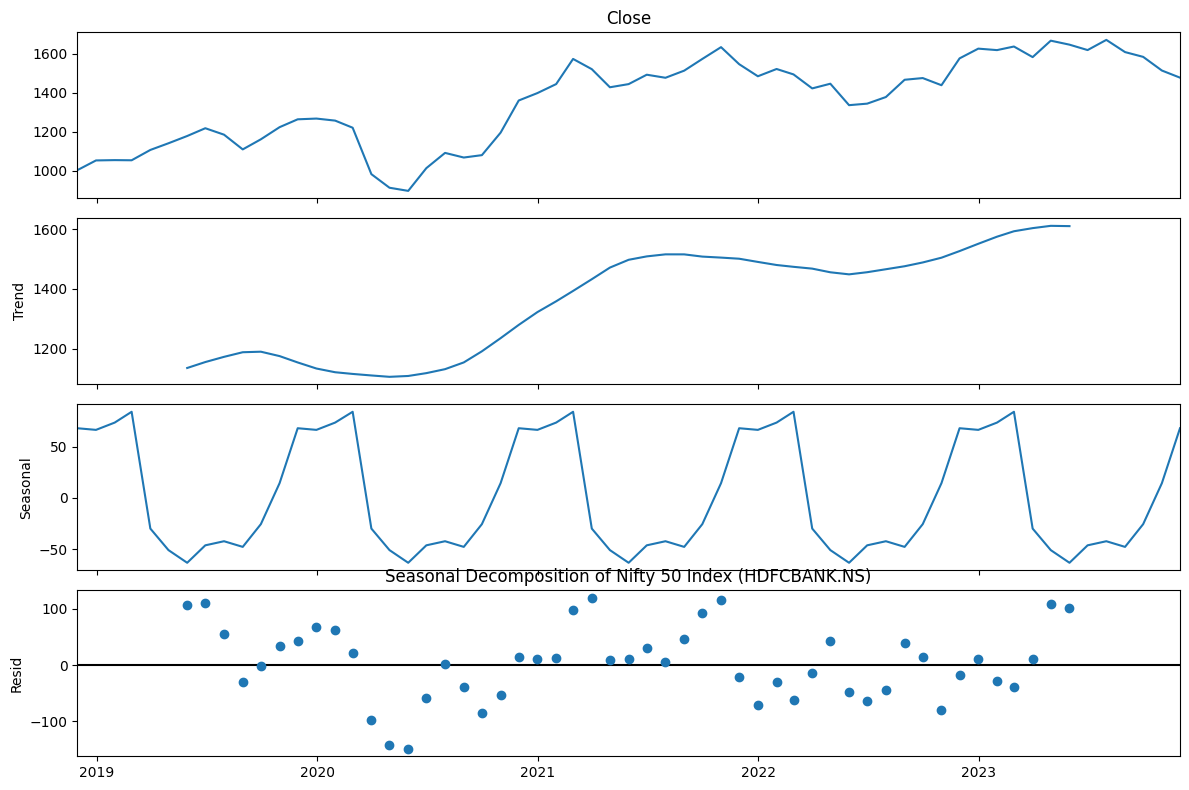

In [16]:


# Fetch historical Nifty 50 index data
data = yf.download(nifty_ticker, period="5y")

# Resample the data on a 6-month basis to observe seasonality
six_monthly_data = data['Close'].resample('1M').mean().dropna()

# Seasonal decomposition
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(six_monthly_data, model='additive')  # Adjusted for 6-month data
fig = decomposition.plot()

# Add title with the ticker name
plt.title('Seasonal Decomposition of Nifty 50 Index (' + nifty_ticker + ')')

plt.show()


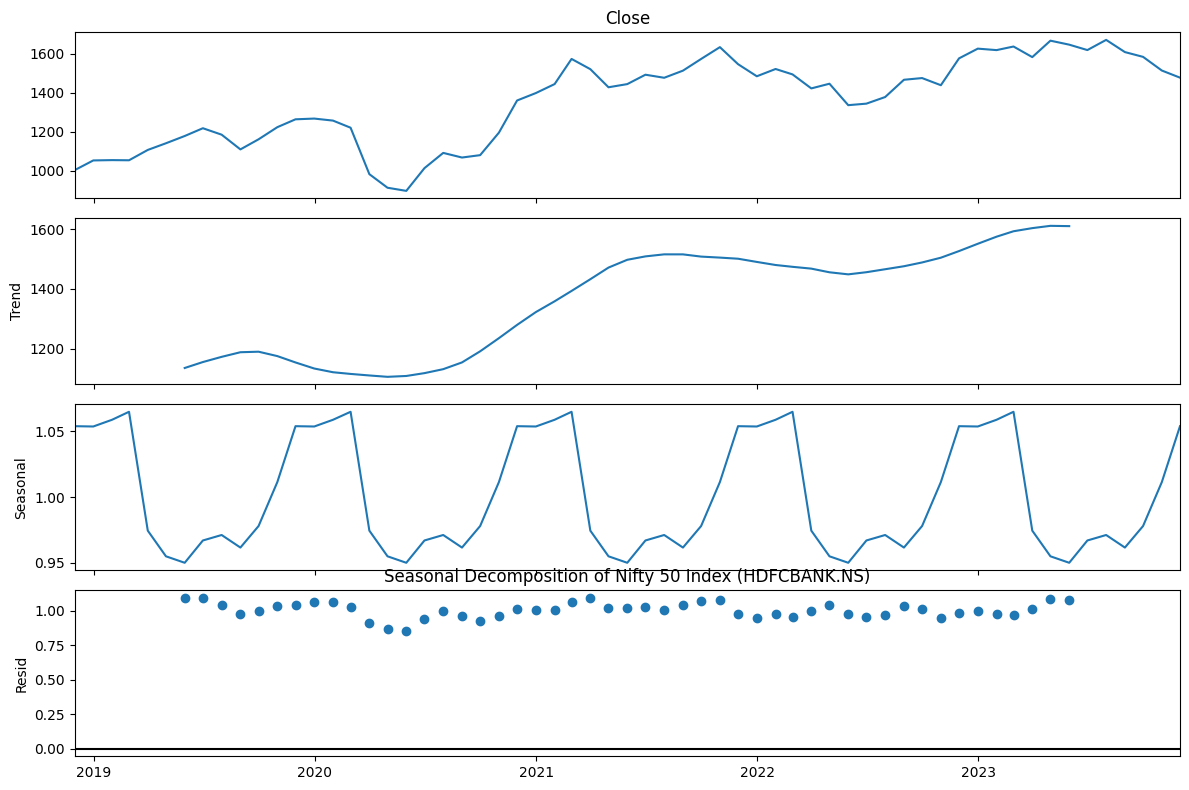

In [17]:

# Resample the data on a 6-month basis to observe seasonality
six_monthly_data = data['Close'].resample('1M').mean().dropna()

# Seasonal decomposition
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(six_monthly_data, model='multiplicative')  # Adjusted for 6-month data
fig = decomposition.plot()

# Add title with the ticker name
plt.title('Seasonal Decomposition of Nifty 50 Index (' + nifty_ticker + ')')

plt.show()

## Build and evaluate time series forecast

## Split time series data into training and test set

In [18]:
data = stock
train_len = 1100
train = data[0:train_len] # first 120 months as training set
test = data[train_len:]

In [19]:
print(train.shape)
print(test.shape)

(1100, 6)
(136, 6)


## Naive method

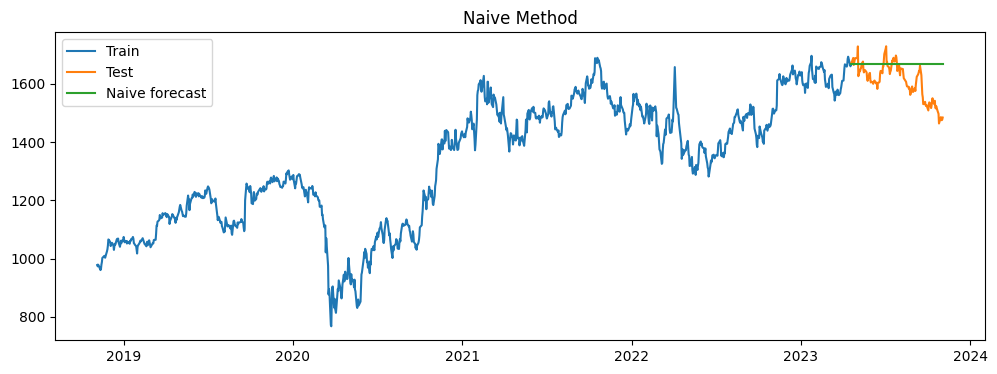

In [20]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Close'][train_len-1]
plt.figure(figsize=(12,4))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Close'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Close']-y_hat_naive['naive_forecast'])/test['Close'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,82.81,4.06


## Simple average method

In [22]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Close'].mean()

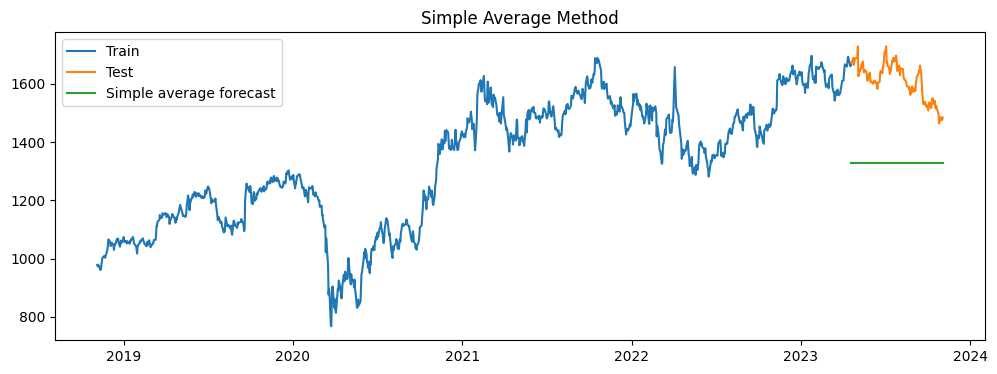

In [23]:
plt.figure(figsize=(12,4))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [24]:
rmse = np.sqrt(mean_squared_error(test['Close'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Close']-y_hat_avg['avg_forecast'])/test['Close'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,82.81,4.06
0,Simple average method,290.30,17.50


## Simple moving average method

In [25]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['Close'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

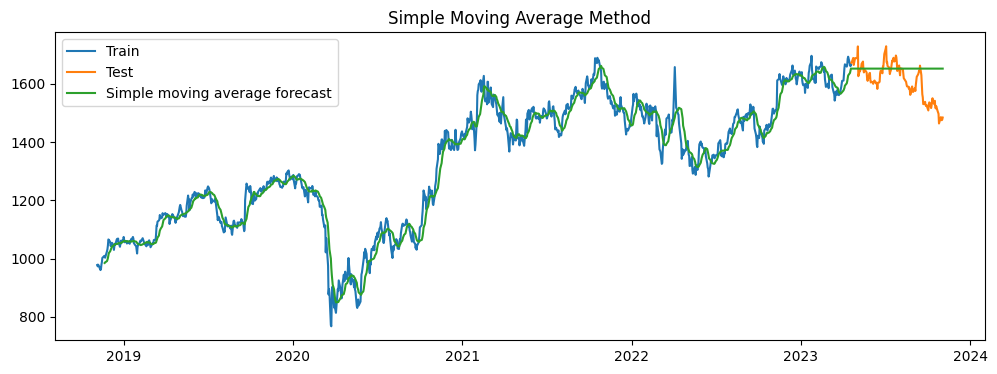

In [26]:
plt.figure(figsize=(12,4))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [27]:
rmse = np.sqrt(mean_squared_error(test['Close'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Close']-y_hat_sma['sma_forecast'][train_len:])/test['Close'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,82.81,4.06
0,Simple average method,290.30,17.50
0,Simple moving average forecast,74.08,3.55


# Exponential smoothing methods

## Simple exponential smoothing

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


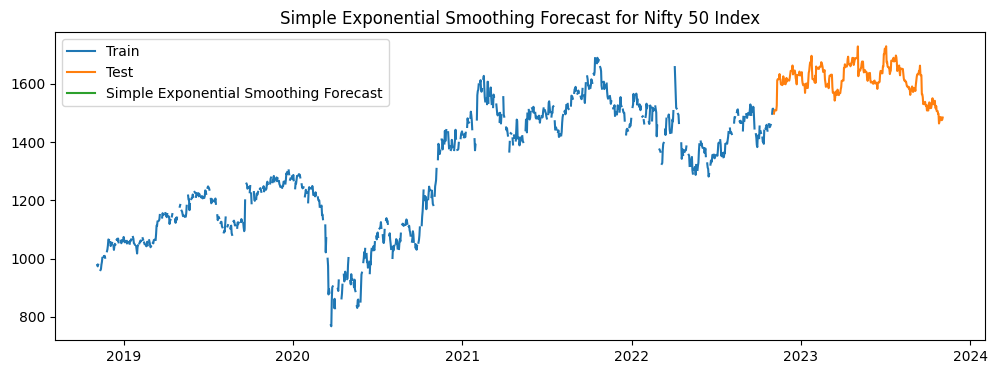

In [28]:

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fetch historical Nifty 50 index data
data = yf.download(nifty_ticker, period="5y")

# Ensure the date index has a valid frequency (daily in this case)
data = data['Close'].asfreq('D')

# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train = data[:train_size]
test = data[train_size:]

# Handle missing values in the test set (if any)
test = test.fillna(method='bfill')

# Simple exponential smoothing
model = SimpleExpSmoothing(train)
model_fit = model.fit()

# Forecast for the test set
y_hat_ses = model_fit.forecast(len(test))

# Plot the results
plt.figure(figsize=(12, 4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_ses, label='Simple Exponential Smoothing Forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Forecast for Nifty 50 Index')
plt.show()



[*********************100%%**********************]  1 of 1 completed


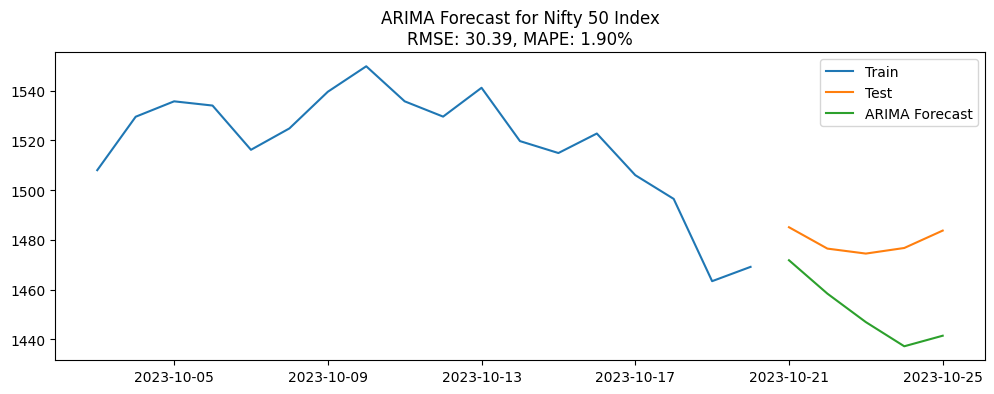

In [29]:

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


# Fetch historical Nifty 50 index data
data = yf.download(nifty_ticker, period="1mo")

# Selecting only the 'Close' prices
close_prices = data['Close'].dropna()

# Ensure the date index has a valid frequency (daily in this case)
close_prices.index = pd.date_range(start=close_prices.index.min(), periods=len(close_prices), freq='D')

# Split the data into train and test sets
train_size = int(len(close_prices) * 0.8)
train = close_prices[:train_size]
test = close_prices[train_size:]

# ARIMA model
model = ARIMA(train, order=(5,1,0))  # Adjust order as needed
model_fit = model.fit()

# Forecast for the test set
pred = model_fit.get_prediction(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
y_hat_arima = pred.predicted_mean

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, y_hat_arima))

# Calculate MAPE
def calculate_mape(y_true, y_pred):
    nonzero_indices = y_true != 0
    mape_values = np.abs((y_true[nonzero_indices] - y_pred[nonzero_indices]) / y_true[nonzero_indices]) * 100
    mape_values[np.isnan(mape_values)] = 0  # Replace NaN with 0
    return np.mean(mape_values)

mape = calculate_mape(test, y_hat_arima)

# Plot the results
plt.figure(figsize=(12, 4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, y_hat_arima, label='ARIMA Forecast')
plt.legend(loc='best')
plt.title('ARIMA Forecast for Nifty 50 Index\nRMSE: {:.2f}, MAPE: {:.2f}%'.format(rmse, mape))
plt.show()


In [30]:
tempResults = pd.DataFrame({'Method':['ARIMA'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,82.810000,4.060000
0,Simple average method,290.300000,17.500000
0,Simple moving average forecast,74.080000,3.550000
0,ARIMA,30.387319,1.903845


[*********************100%%**********************]  1 of 1 completed


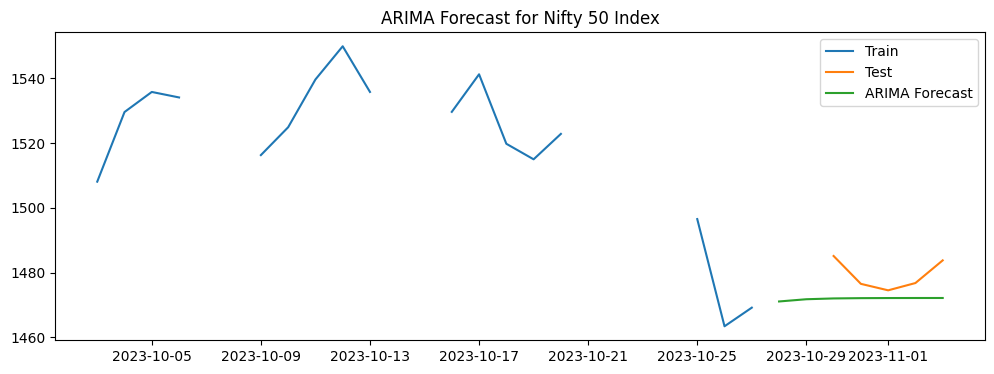

In [31]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Get the historical Nifty 50 index data
nifty_data = yf.download(nifty_ticker, period="1mo")

# Ensure the date index has a valid frequency (daily in this case)
nifty_data = nifty_data['Close'].asfreq('D')

# Split the data into train and test sets
train_size = int(len(nifty_data) * 0.8)
train = nifty_data[:train_size]
test = nifty_data[train_size:]

# Fit the ARIMA model to the train set
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Forecast the data for the test set
y_hat = model_fit.forecast(len(test))

# Plot the results
plt.figure(figsize=(12, 4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat, label='ARIMA Forecast')
plt.legend(loc='best')
plt.title('ARIMA Forecast for Nifty 50 Index')
plt.show()



[*********************100%%**********************]  1 of 1 completed


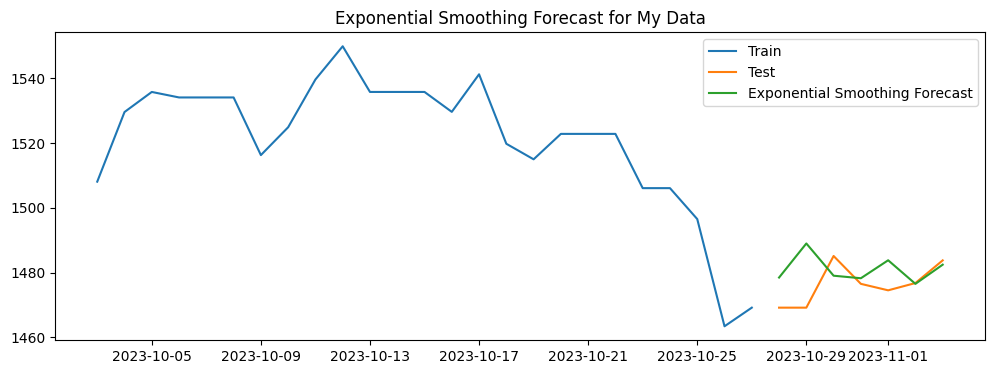

In [32]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Get the historical Nifty 50 index data
nifty_data = yf.download(nifty_ticker, period="1mo")

data = nifty_data['Close'].asfreq('D').fillna(method='ffill')



# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train = data[:train_size]
test = data[train_size:]

# Fit the Holt-Winters exponential smoothing model to the train set
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Forecast the future values of the time series
y_hat = model_fit.forecast(len(test))

# Plot the results
plt.figure(figsize=(12, 4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat, label='Exponential Smoothing Forecast')
plt.legend(loc='best')
plt.title('Exponential Smoothing Forecast for My Data')
plt.show()



In [33]:
rmse = np.sqrt(mean_squared_error(test, y_hat)).round(2)
mape = np.round(np.mean(np.abs(test-y_hat)/test)*100,2)

tempResults = pd.DataFrame({'Method':['Holtz Winter Exponential forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,82.810000,4.060000
0,Simple average method,290.300000,17.500000
0,Simple moving average forecast,74.080000,3.550000
0,ARIMA,30.387319,1.903845
0,Holtz Winter Exponential forecast,9.310000,0.460000


In [34]:


# Get the historical Nifty 50 index data
nifty_data = yf.download(nifty_ticker, period="2mo")

data = nifty_data['Close'].asfreq('D').fillna(method='ffill')
final_model = ExponentialSmoothing(data, trend="add", seasonal='add', seasonal_periods=4).fit()
pred = final_model.forecast(20)
pred

[*********************100%%**********************]  1 of 1 completed


2023-11-04    1481.294786
2023-11-05    1481.387246
2023-11-06    1482.093533
2023-11-07    1477.064899
2023-11-08    1474.611357
2023-11-09    1474.703817
2023-11-10    1475.410104
2023-11-11    1470.381470
2023-11-12    1467.927928
2023-11-13    1468.020389
2023-11-14    1468.726675
2023-11-15    1463.698041
2023-11-16    1461.244500
2023-11-17    1461.336960
2023-11-18    1462.043246
2023-11-19    1457.014612
2023-11-20    1454.561071
2023-11-21    1454.653531
2023-11-22    1455.359817
2023-11-23    1450.331183
Freq: D, dtype: float64

<Axes: xlabel='Date'>

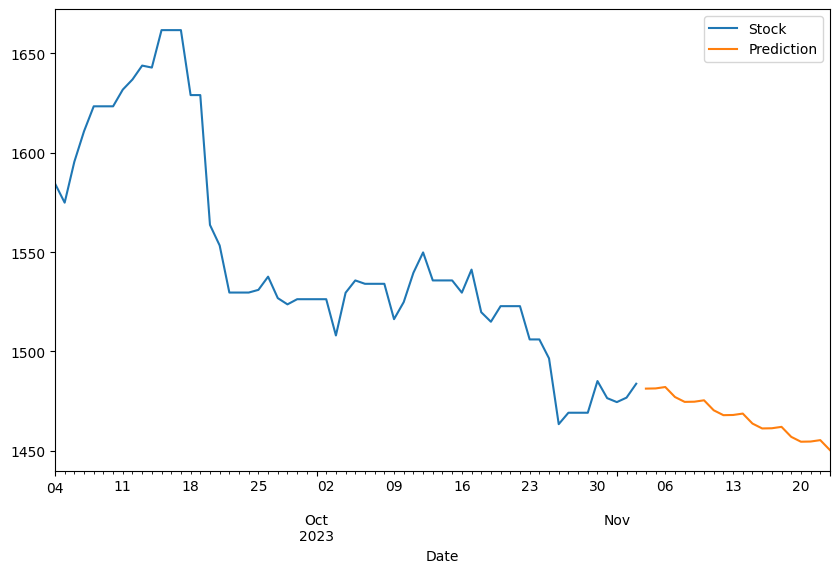

In [35]:
data.plot(legend= True, label='Stock', figsize=(10,6))
pred.plot(legend= True, label='Prediction')